<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/4_Multilayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
import torch
import torch.nn as nn

---
# Activation Functions

Different activation functions provide different uses

### Sigmoid / Logistic function

Transform $ - \infty $ to $ \infty $ into 0 to 1 range
$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

In [24]:
inp_min = -5.0
inp_max = 5.0
inp_sz  = 100
inp_din = (inp_max - inp_min) / inp_sz
 
inp = torch.linspace(inp_min, inp_max, inp_sz)

In [25]:
sig_out = torch.sigmoid(inp)

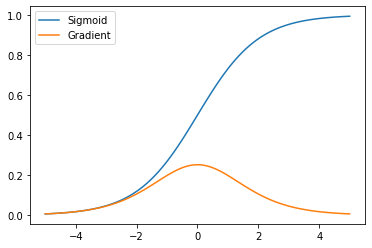

In [28]:
plt.plot(inp, sig_out, label="Sigmoid")
plt.plot(inp, np.gradient(sig_out)/inp_din, label="Gradient")
plt.legend()
plt.show()

### Tanh function

$$ 
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

Similar to sigmoid, difference being that output is -1 to +1

In [5]:
tanh_out = torch.tanh(inp)

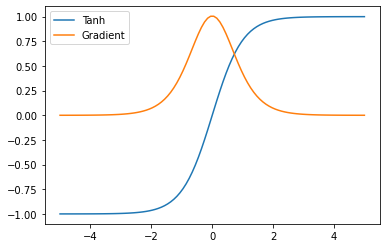

In [29]:
plt.plot(inp, tanh_out, label="Tanh")
plt.plot(inp, np.gradient(tanh_out)/inp_din, label='Gradient')
plt.legend()
plt.show()

### Rectified Linear Unit (ReLU)

ReLU is basically like a diode. It makes sure that output is always > 0.

$$
ReLU(x) = 
\left\{ \begin{array}{r} 
x, x > 0\\[1ex]
0, x \le 0
\end{array} \right. 
$$

In [7]:
relu_out = torch.relu(inp)

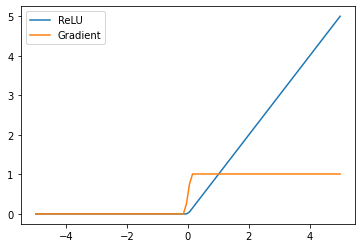

In [30]:
plt.plot(inp, relu_out, label="ReLU")
plt.plot(inp, np.gradient(relu_out)/inp_din, label='Gradient')
plt.legend()
plt.show()

But, the gradient of ReLU becomes zero for $ x \le 0 $ which can lead to some neurons *dying* because all neurons have negative input to the ReLU function.

### Leaky ReLU

Leaky relu is similar to ReLU but has a very small gradient when $ x \lt 0 $

In [9]:
lrelu_out = torch.nn.functional.leaky_relu(inp)

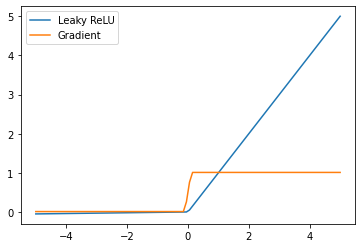

In [14]:
plt.plot(inp, lrelu_out, label="Leaky ReLU")
plt.plot(inp, np.gradient(lrelu_out)/0.1, label="Gradient")
plt.legend()
plt.show()

In [ ]:
plt.plot(inp, lrelu_out, label="Leaky ReLU")
plt.plot(inp, np.gradient(lrelu_out)/0.1, label="Gradient")
plt.legend()
plt.show()

In [ ]:
print(" ReLU at -1       : %.3f"%(torch.relu(torch.tensor(-1.0))))
print(" Leaky ReLU at -1 : %.3f"%(torch.nn.functional.leaky_relu(torch.tensor(-1.0))))

 ReLU at -1       : 0.000
 Leaky ReLU at -1 : -0.010


---

# Multilayer neural network

[]

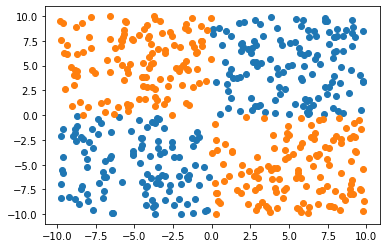

In [ ]:
data_len = 500

data_x = np.random.uniform(-10, 10, size=(data_len, 1))
data_y = np.random.uniform(-10, 10, size=(data_len, 1))

data_in = np.concatenate((data_x, data_y), axis=1)

x_bool = data_x > 0
y_bool = data_y > 0

data_out = (x_bool & y_bool) | ((~x_bool) & (~y_bool))

data_on   = np.asarray([data_in[i] for i in range(data_len) if data_out[i]])
data_off  = np.asarray([data_in[i] for i in range(data_len) if not data_out[i]])

plt.scatter(data_on[:,0], data_on[:,1])
plt.scatter(data_off[:,0], data_off[:,1])
plt.plot()

In [ ]:
#@title
def vis_boundary(data, labels, fun, show_points=True):
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)
  X_flat = X.reshape((-1, 1))
  Y_flat = Y.reshape((-1, 1))
  out = fun(np.concatenate((X_flat, Y_flat), axis=1))

  c = plt.contourf(X, Y, out.reshape(X.shape), cmap='plasma')
  plt.colorbar(c)
  
  if(show_points):
    inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
    inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])
    plt.scatter(inp0[:,0], inp0[:,1], label="Category 0", color="blue")
    plt.scatter(inp1[:,0], inp1[:,1], label="Category 1", color="red")
    plt.legend()
    
  plt.show()

In [ ]:
#@title
def vis_boundary3D(data, labels, fun, show_points=True):  
  x_min = min(data[:,0])
  x_max = max(data[:,0])

  y_min = min(data[:,1])
  y_max = max(data[:,1])

  x_arr = np.linspace(x_min, x_max, 25)
  y_arr = np.linspace(y_min, y_max, 25)

  X, Y = np.meshgrid(x_arr, y_arr)
  X_flat = X.reshape((-1, 1))
  Y_flat = Y.reshape((-1, 1))
  out = fun(np.concatenate((X_flat, Y_flat), axis=1))

  inp1 = np.asarray([data[i] for i in range(data.shape[0]) if labels[i]])
  inp0 = np.asarray([data[i] for i in range(data.shape[0]) if not labels[i]])

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.set_title("Z")
  
  if(show_points):
    ax.scatter(inp0[:,0], inp0[:,1], np.zeros_like(inp0[:,0]), label="Category 0", color="blue")
    ax.scatter(inp1[:,0], inp1[:,1], np.ones_like(inp1[:,0]), label="Category 1", color="red")
    ax.legend()
  
  c = ax.plot_surface(X, Y, out.reshape(X.shape), cmap='plasma', alpha=0.5)
  ax.view_init(20, -70)

  fig.show()
  plt.show()

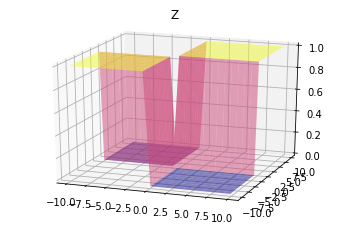

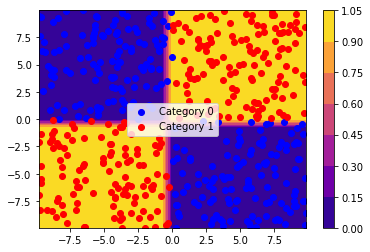

In [ ]:
vis_boundary3D(data_in, data_out, lambda x : ~((x[:,0] > 0) ^ (x[:,1] > 0)).reshape(-1, 1), False)

vis_boundary(data_in, data_out, lambda x : ~((x[:,0] > 0) ^ (x[:,1] > 0)).reshape(-1, 1))

In [ ]:
class single_layer_network(nn.Module):
  def __init__(self):
    super(single_layer_network, self).__init__()
    self.fc1 = nn.Linear(2, 4)
    self.fc2 = nn.Linear(4, 1)

  def forward(self, x):
    x = torch.tanh(self.fc1(x))
    out = torch.sigmoid(self.fc2(x))
    return out

  def hidden(self, x):
    return torch.tanh(self.fc1(x))

  def print(self):
    return 

In [ ]:
model = single_layer_network()
criterion = nn.BCELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-1)

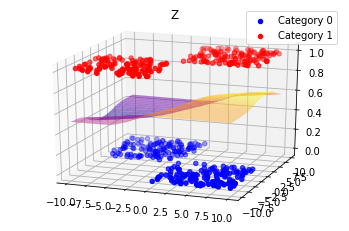

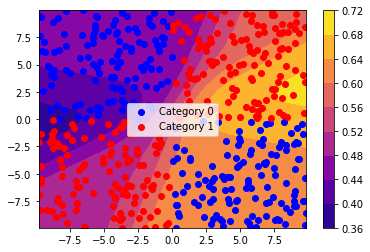

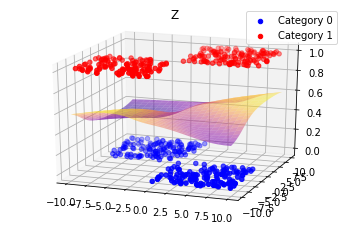

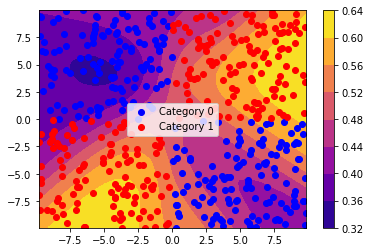

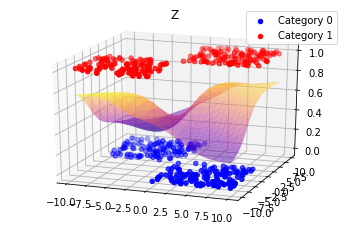

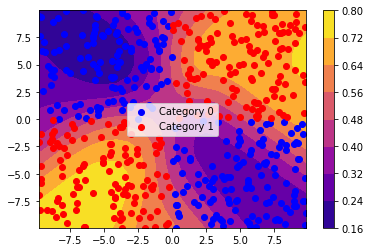

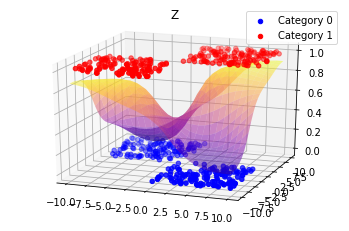

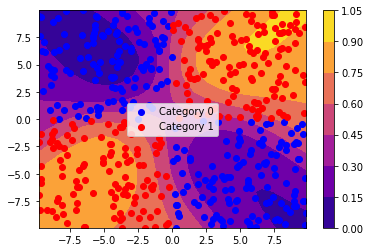

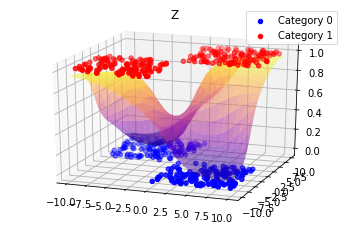

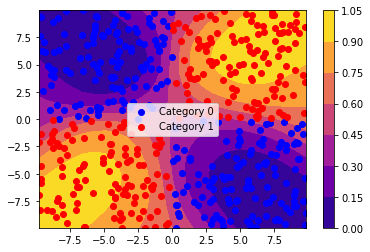

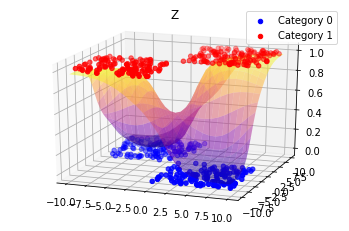

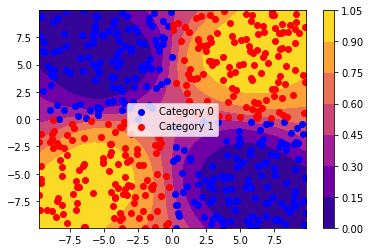

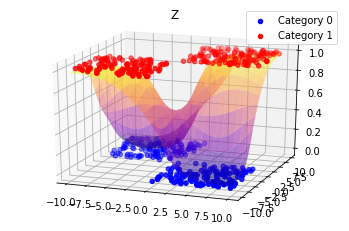

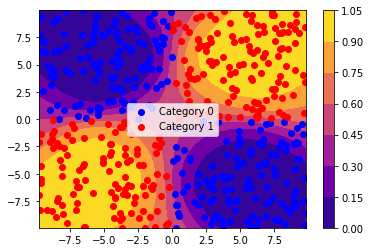

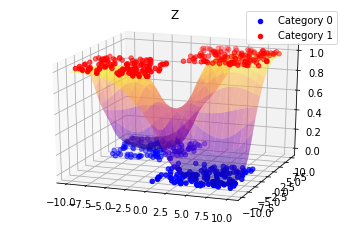

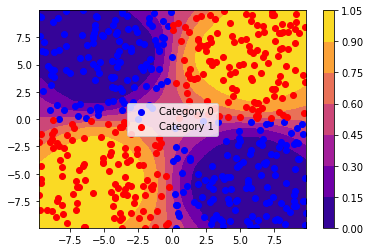

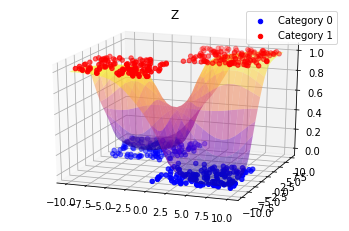

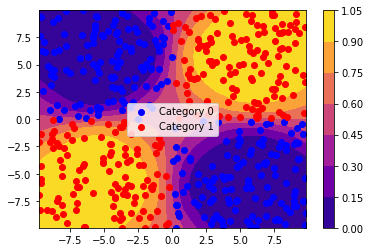

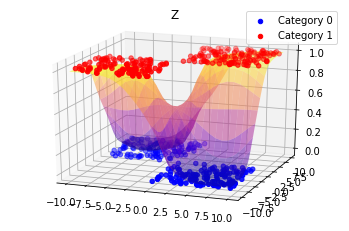

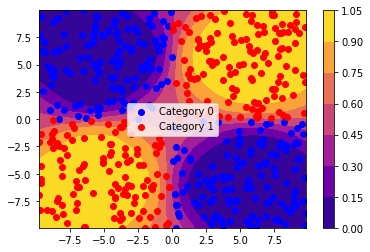

In [ ]:
epoch = 1000

x_train = torch.tensor(data_in, dtype=torch.float)
y_train = torch.tensor(data_out, dtype=torch.float)
for epoch in range(epoch):
    optim.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred, y_train)

    if(epoch % 100 == 0):
      vis_boundary3D(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy().astype(float)))
  
      vis_boundary(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy().astype(float)))

    # Backward pass
    loss.backward()
    optim.step()

Neuron 0 : 


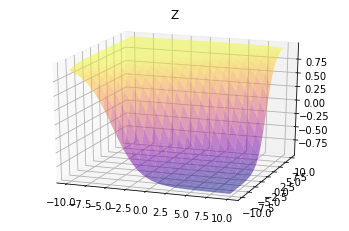

Neuron 1 : 


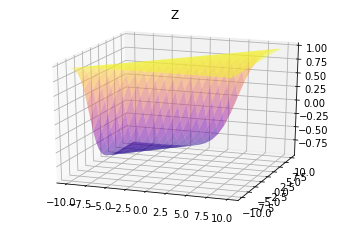

Neuron 2 : 


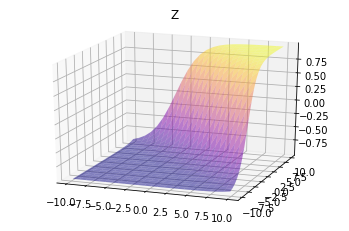

Neuron 3 : 


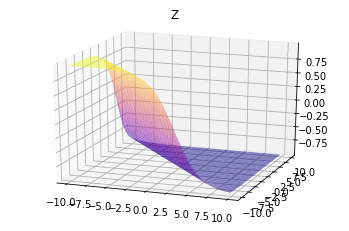

The final result


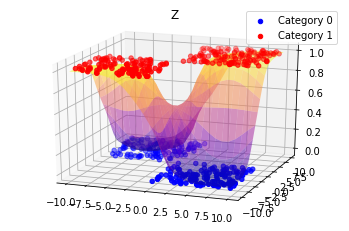

 Output layer weghts : 
weight tensor([[2.6444, 2.8126, 2.6296, 2.7982]])
bias tensor([0.2120])


In [ ]:
for hid_idx in range(4):
  print("Neuron %d : "%hid_idx)

  vis_boundary3D(data_in, data_out, lambda x : (model.hidden(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), False)

print("The final result")

vis_boundary3D(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))

print(" Output layer weghts : ")
for name, param in model.fc2.named_parameters():
  if param.requires_grad:
    print(name, param.data)

Neuron 0 : 


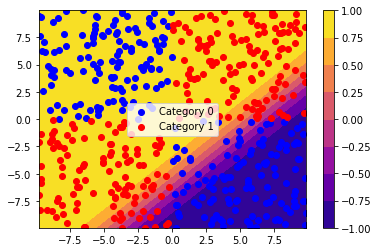

Neuron 1 : 


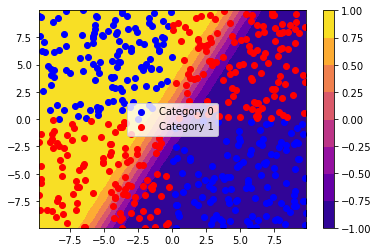

Neuron 2 : 


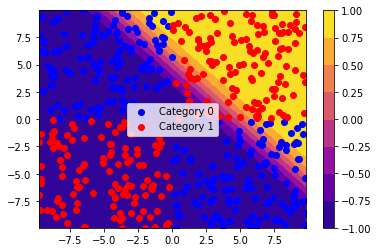

Neuron 3 : 


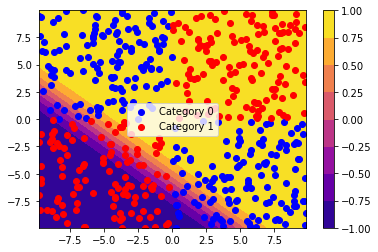

The final result


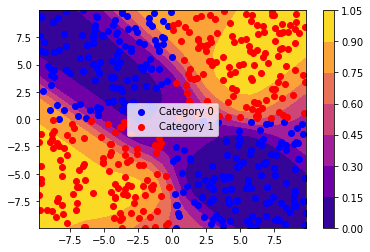

 Output layer weghts : 
weight tensor([[ 1.6445, -0.5622,  1.8251, -2.1650]])
bias tensor([0.9376])


In [ ]:
for hid_idx in range(4):
  print("Neuron %d : "%hid_idx)

  vis_boundary(data_in, data_out, lambda x : (model.hidden(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()))

print("The final result")

vis_boundary(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))

print(" Output layer weghts : ")
for name, param in model.fc2.named_parameters():
  if param.requires_grad:
    print(name, param.data)

In [ ]:
class multi_layer_network(nn.Module):
  def __init__(self):
    super(multi_layer_network, self).__init__()
    self.fc1 = nn.Linear(2, 4)
    self.fc2 = nn.Linear(4, 4)
    self.fc3 = nn.Linear(4, 1)

  def forward(self, x):
    x = torch.tanh(self.fc1(x))
    x = torch.tanh(self.fc2(x))
    return torch.sigmoid(self.fc3(x))

  def hidden_l1(self, x):
    return torch.tanh(self.fc1(x))

  def hidden_l2(self, x):
    x = torch.tanh(self.fc1(x))
    return torch.tanh(self.fc2(x))

  def print(self):
    return 

In [ ]:
model = multi_layer_network()
criterion = nn.BCELoss()
optim = torch.optim.SGD(model.parameters(), lr=1e-1)

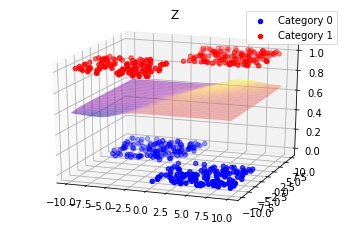

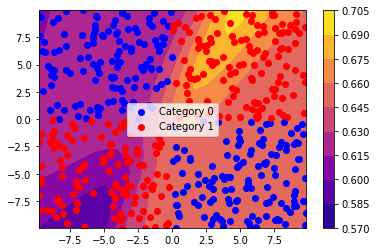

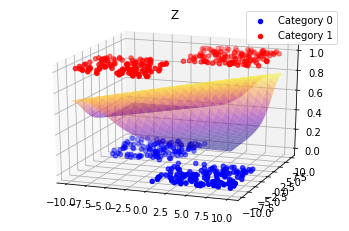

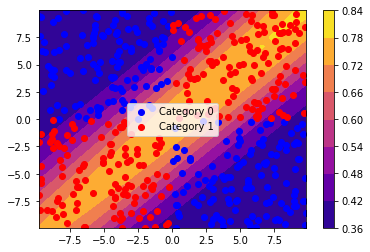

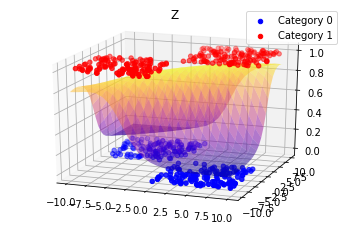

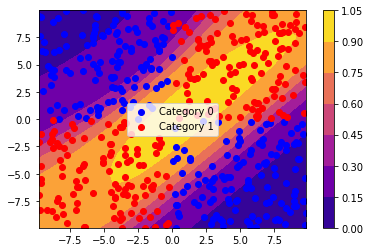

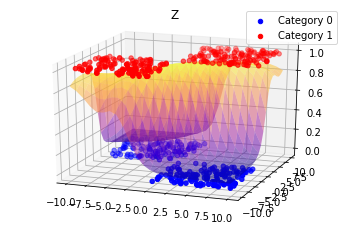

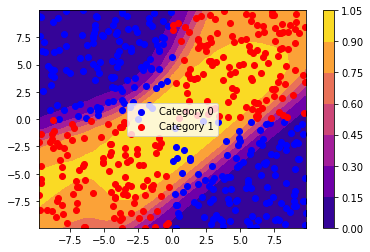

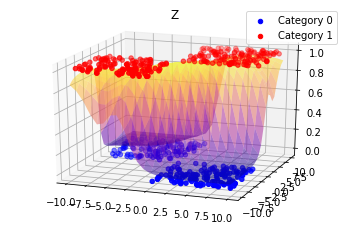

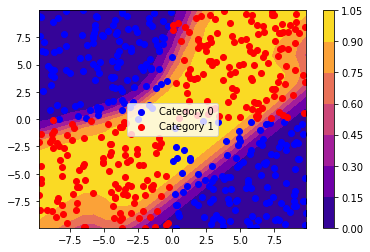

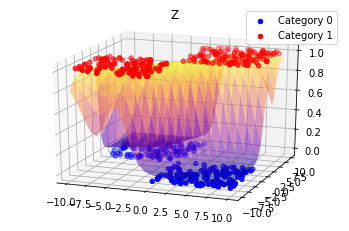

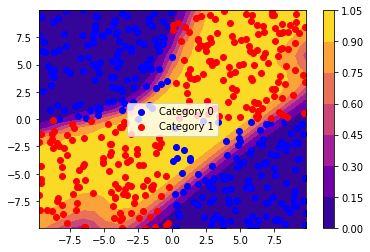

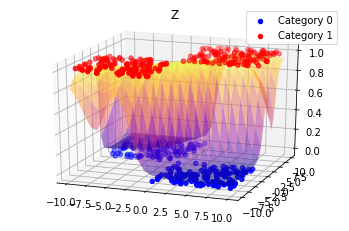

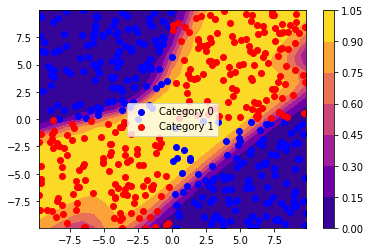

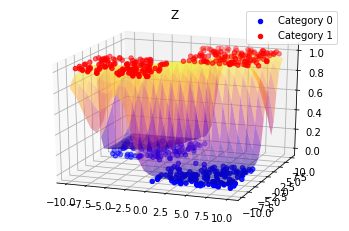

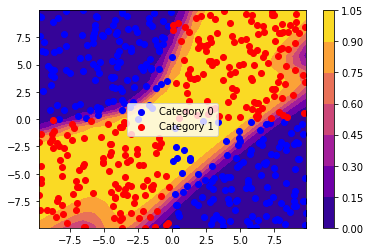

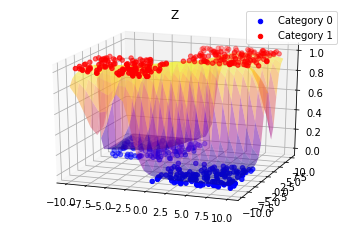

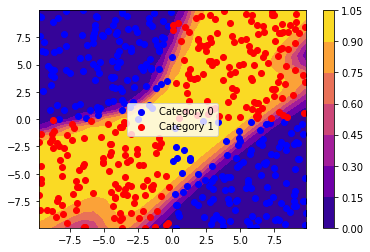

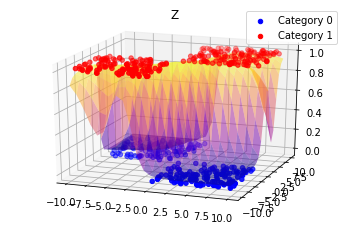

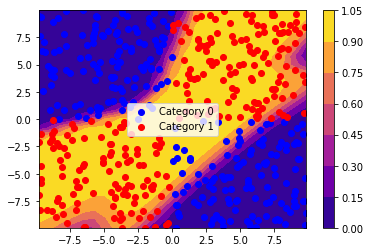

In [ ]:
epoch = 1000

x_train = torch.tensor(data_in, dtype=torch.float)
y_train = torch.tensor(data_out, dtype=torch.float)
for epoch in range(epoch):
    optim.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred, y_train)

    if(epoch % 100 == 0):
      vis_boundary3D(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy().astype(float)))
  
      vis_boundary(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy().astype(float)))

    # Backward pass
    loss.backward()
    optim.step()

Neuron 0 : 


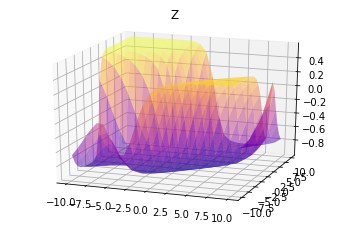

Neuron 1 : 


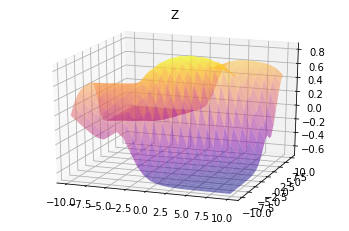

Neuron 2 : 


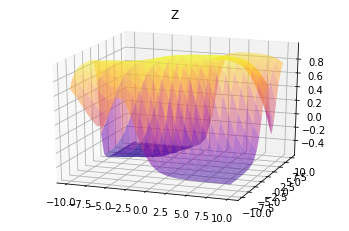

Neuron 3 : 


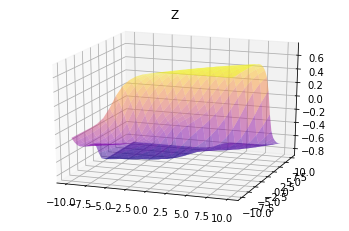

The final result


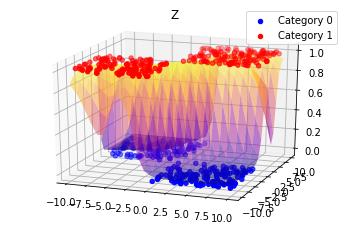

 Output layer weghts : 
weight tensor([[-2.0046,  0.9277,  1.9652, -0.2409]])
bias tensor([-1.0116])


In [ ]:
for hid_idx in range(4):
  print("Neuron %d : "%hid_idx)

  vis_boundary3D(data_in, data_out, lambda x : (model.hidden_l2(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()), False)

print("The final result")

vis_boundary3D(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))

print(" Output layer weghts : ")
for name, param in model.fc3.named_parameters():
  if param.requires_grad:
    print(name, param.data)

Neuron 0 : 


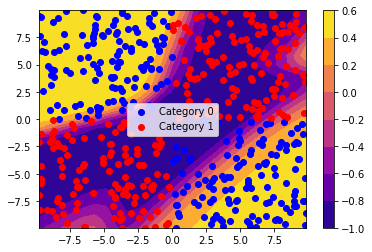

Neuron 1 : 


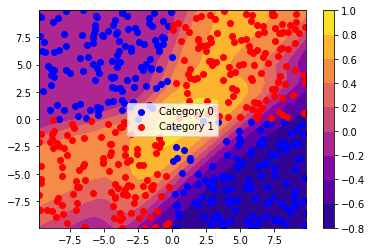

Neuron 2 : 


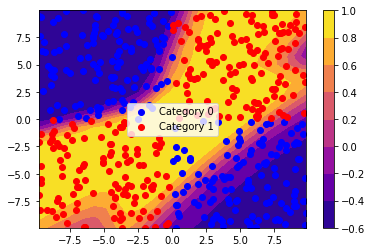

Neuron 3 : 


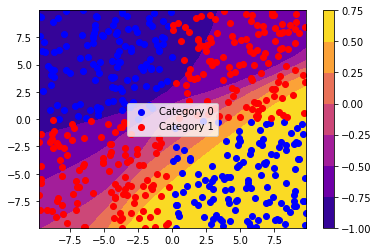

The final result


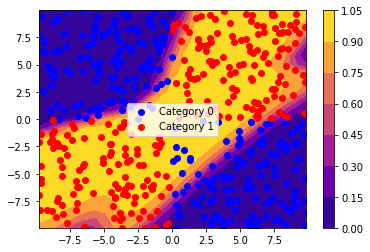

 Output layer weghts : 
weight tensor([[-2.0046,  0.9277,  1.9652, -0.2409]])
bias tensor([-1.0116])


In [ ]:
for hid_idx in range(4):
  print("Neuron %d : "%hid_idx)

  vis_boundary(data_in, data_out, lambda x : (model.hidden_l2(torch.tensor(x, dtype=torch.float))[:,hid_idx].detach().numpy()))

print("The final result")

vis_boundary(data_in, data_out, lambda x : (model.forward(torch.tensor(x, dtype=torch.float)).detach().numpy()))

print(" Output layer weghts : ")
for name, param in model.fc3.named_parameters():
  if param.requires_grad:
    print(name, param.data)